## Imagen Integral

<img src = "original.png" width = 300/>

## $s(i,j) = \sum_{k=0}^i \sum_{l=0}^j f(k,l)$

<img src = 'suma.png' width = 300/>

## $s(i,j) = s(i-1,j) +s(i,j-1)-s(i-1,j-1)+f(i,j)$

## Bilateral filter

# $g(i,j) = \frac{\sum_{k,l}f(k,l)w(i,j,k,l)}{\sum_{k,l}w(i,j,k,l)}$

# $w(i,j,k,l) = exp(-\frac{(i-k)^2+(j-l)^2}{2\sigma^2_d}-\frac{||f(i,j)-f(k,l)||^2}{2\sigma_r^2})$

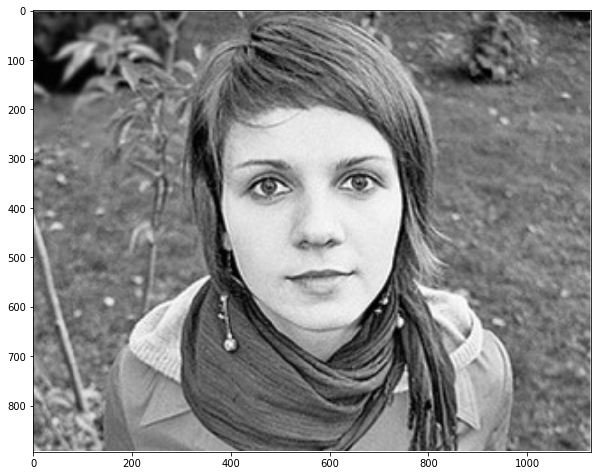

In [7]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

girl = cv2.imread('girl.png')
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(girl,cv2.COLOR_BGR2RGB))

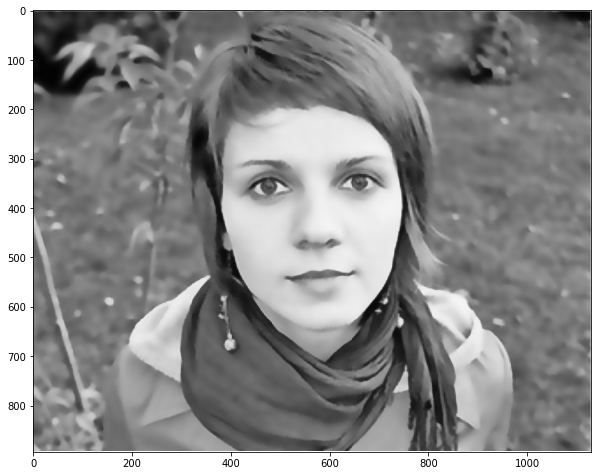

In [217]:
girl_bilateral = cv2.bilateralFilter(girl,20,sigmaColor = 100,sigmaSpace =4000)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(girl_bilateral,cv2.COLOR_BGR2RGB))

### Operaciones morfológicas

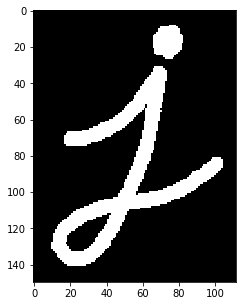

In [25]:
j = cv2.imread('j.png')
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(j,cv2.COLOR_BGR2RGB))

<img src = 'structural.png' width =600/>

### Dilatación

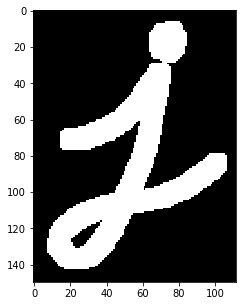

In [220]:
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(j,kernel,iterations = 1)
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(dilation,cv2.COLOR_BGR2RGB))

### Erosión

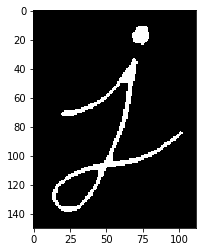

In [50]:
erosion = cv2.erode(j,kernel,iterations = 1)
plt.imshow(cv2.cvtColor(erosion,cv2.COLOR_BGR2RGB))

### opening

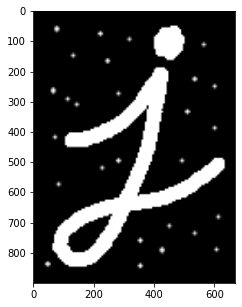

In [222]:
opening = cv2.imread('opening.png')
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(opening,cv2.COLOR_BGR2RGB))

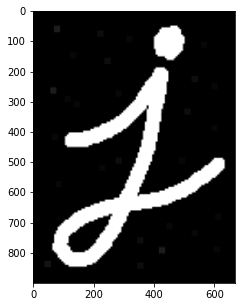

In [227]:
erosion = cv2.erode(opening,kernel,iterations =4)

dilation = cv2.dilate(erosion,kernel,iterations = 4)
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(dilation,cv2.COLOR_BGR2RGB))


### closing

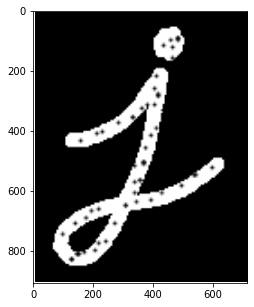

In [230]:
closing = cv2.imread('closing.png')
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(closing,cv2.COLOR_BGR2RGB))

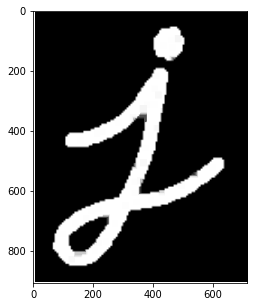

In [245]:
dilation = cv2.dilate(closing,kernel,iterations = 5)
erosion = cv2.erode(dilation,kernel,iterations = 5)
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(erosion,cv2.COLOR_BGR2RGB))


### Sharp image

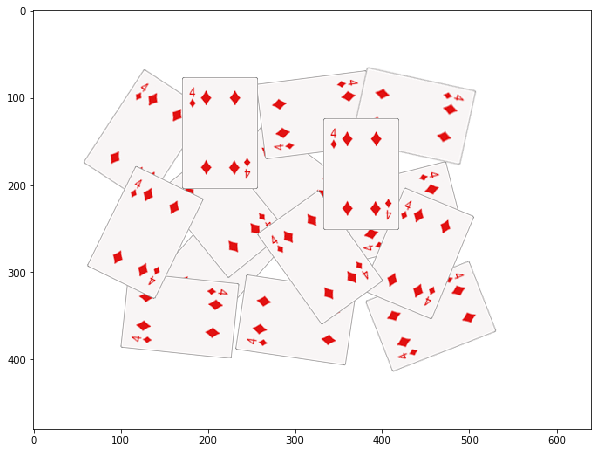

In [171]:
cards = cv2.imread('cards.png')
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(cards,cv2.COLOR_BGR2RGB))

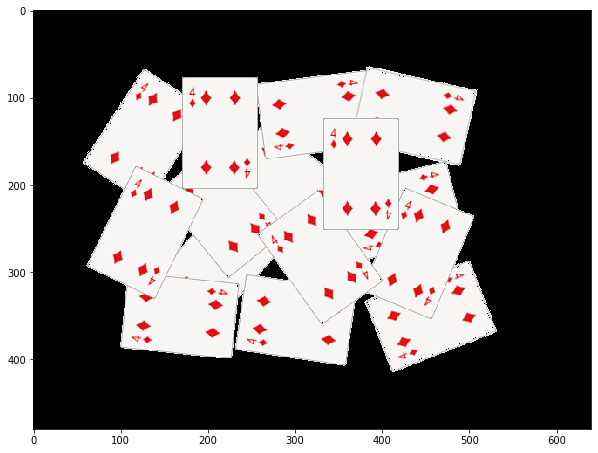

In [172]:
cards[np.all(cards == 255, axis=2)] = 0
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(cards,cv2.COLOR_BGR2RGB))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


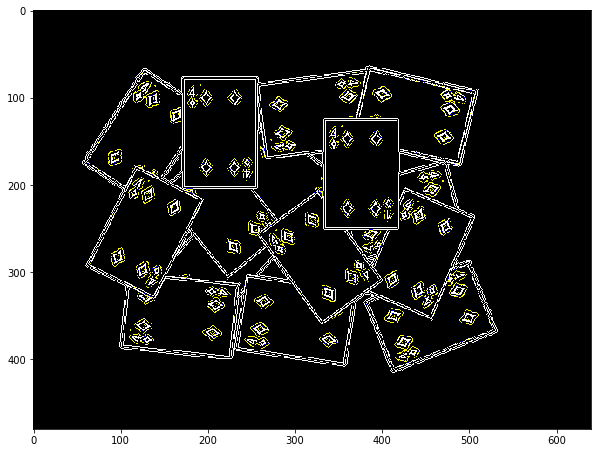

In [190]:
laplacian = cv2.Laplacian(cards,cv2.CV_64F)
plt.figure(figsize=(10,10))
plt.imshow(laplacian,'gray')

In [174]:
sharp = np.float32(cards)
res = sharp - laplacian
res = np.clip(res, 0, 255)
res = res.astype('uint8')
laplacian = np.clip(laplacian, 0, 255)
laplacian = laplacian.astype('uint8')
    

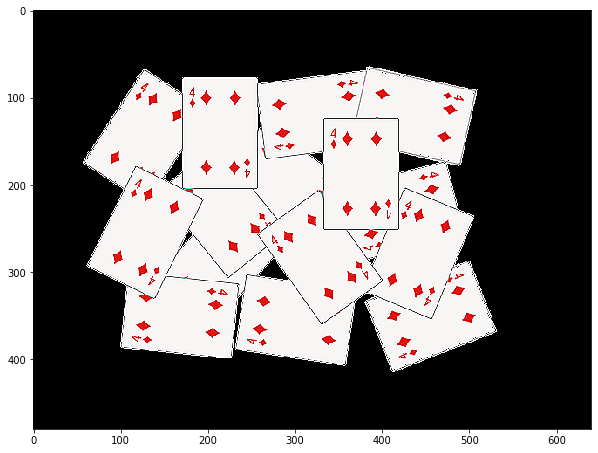

In [175]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))

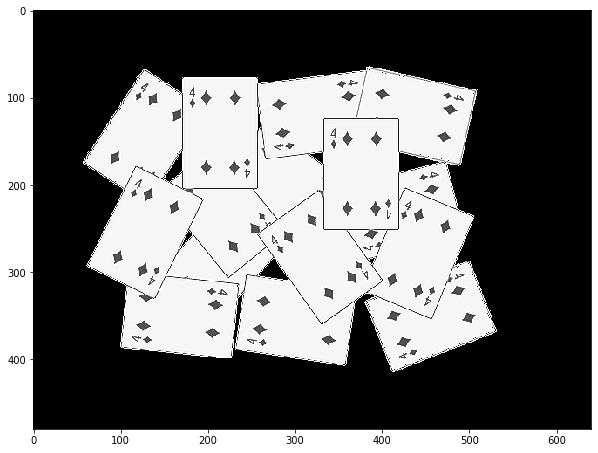

In [180]:
bw = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(bw,'gray')

### Binarizar imagen

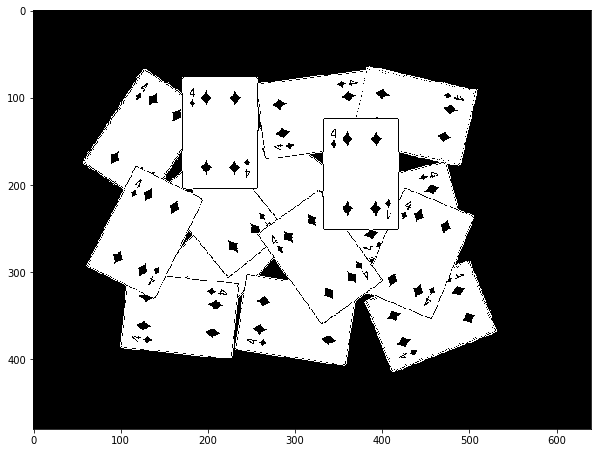

In [181]:
_, bw = cv2.threshold(bw, 40, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.figure(figsize=(10,10))
plt.imshow(bw,'gray')

### Distance transform

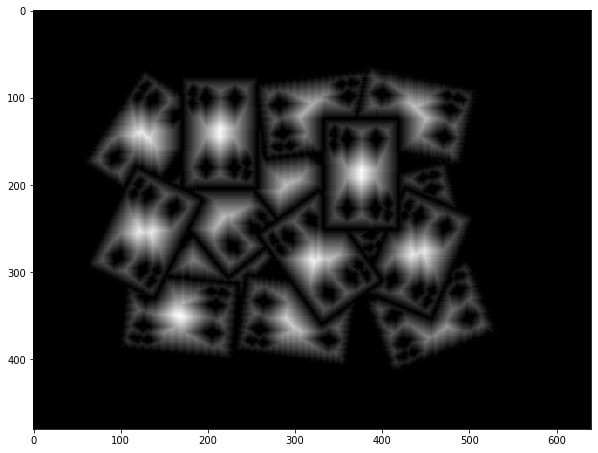

In [246]:
dist = cv2.distanceTransform(bw, cv2.DIST_L1, 3)
cv2.normalize(dist, dist, 0, 1.0, cv2.NORM_MINMAX)
plt.figure(figsize=(10,10))
plt.imshow(dist,'gray')

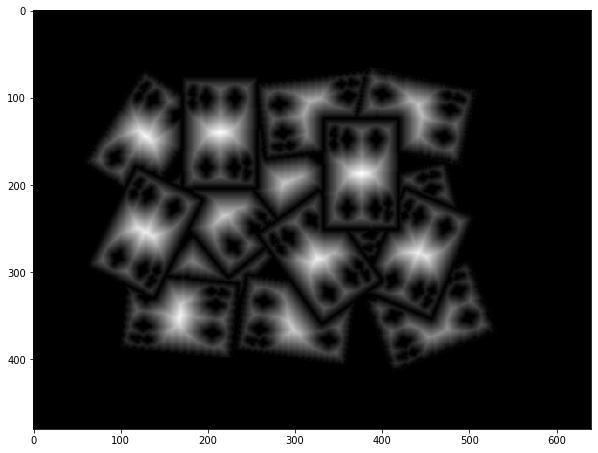

In [247]:
dist = cv2.distanceTransform(bw, cv2.DIST_L2, 3)
cv2.normalize(dist, dist, 0, 1.0, cv2.NORM_MINMAX)
plt.figure(figsize=(10,10))
plt.imshow(dist,'gray')